# Image Classification using Tensorflow (Fashion MNIST Dataset)

https://thecleverprogrammer.com/2020/08/30/image-classification-with-tensorflow-in-machine-learning/

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess The Data

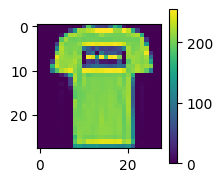

In [14]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Now I’m going to scale these values ​​to a range of 0 to 1 before passing them to the neural network model. To do this, we need to divide the values ​​by 255. The training set and the test set should be preprocessed in the same way:

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0


To verify that the data is in the correct format and to verify that we are ready to create and train the neural network for image classification with TensorFlow, let’s display the first 25 images of the training set and display the name of the class under each image:

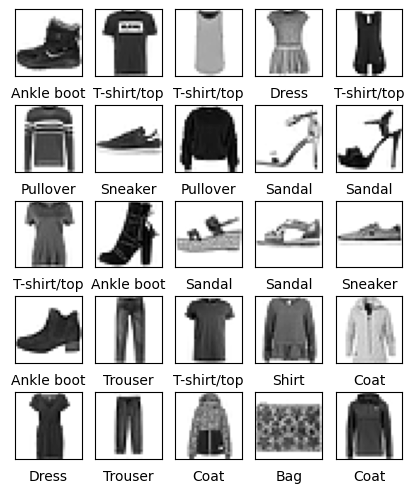

In [20]:
plt.figure(figsize=(5,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Image Classification with TensorFlow: Building Model

#### Setting Up Layers - 
The basic building block of neural networks is its layers. Layers work by extracting the representations from data fed into them. Most of the deep learning, Models involves doing simple layers together. Now, let’s create the layers of our neural network:

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

2022-12-08 11:04:16.183788: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 11:04:16.186213: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


#### Compiling The Model

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Image Classification with TensorFlow: Training Model

In [23]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4969 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3750 - accuracy: 0.8657
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3366 - accuracy: 0.8782
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3135 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2944 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2811 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2662 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2570 - accuracy: 0.9051
Epoch 9/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2504 - accuracy: 0.9063
Epoch 10/1

In [24]:
#Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([1.5127469e-08, 8.3472031e-12, 3.1492334e-08, 6.1665048e-11,
       3.4362412e-08, 2.5267764e-03, 1.9253447e-07, 1.5898442e-02,
       1.3891704e-08, 9.8157448e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

Thus, the model is most convinced that this image is an ankle boot, or class_names [9]. Examination of the test label shows that this classification is correct:

In [26]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify the predictions

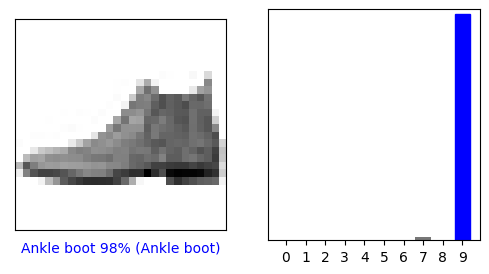

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

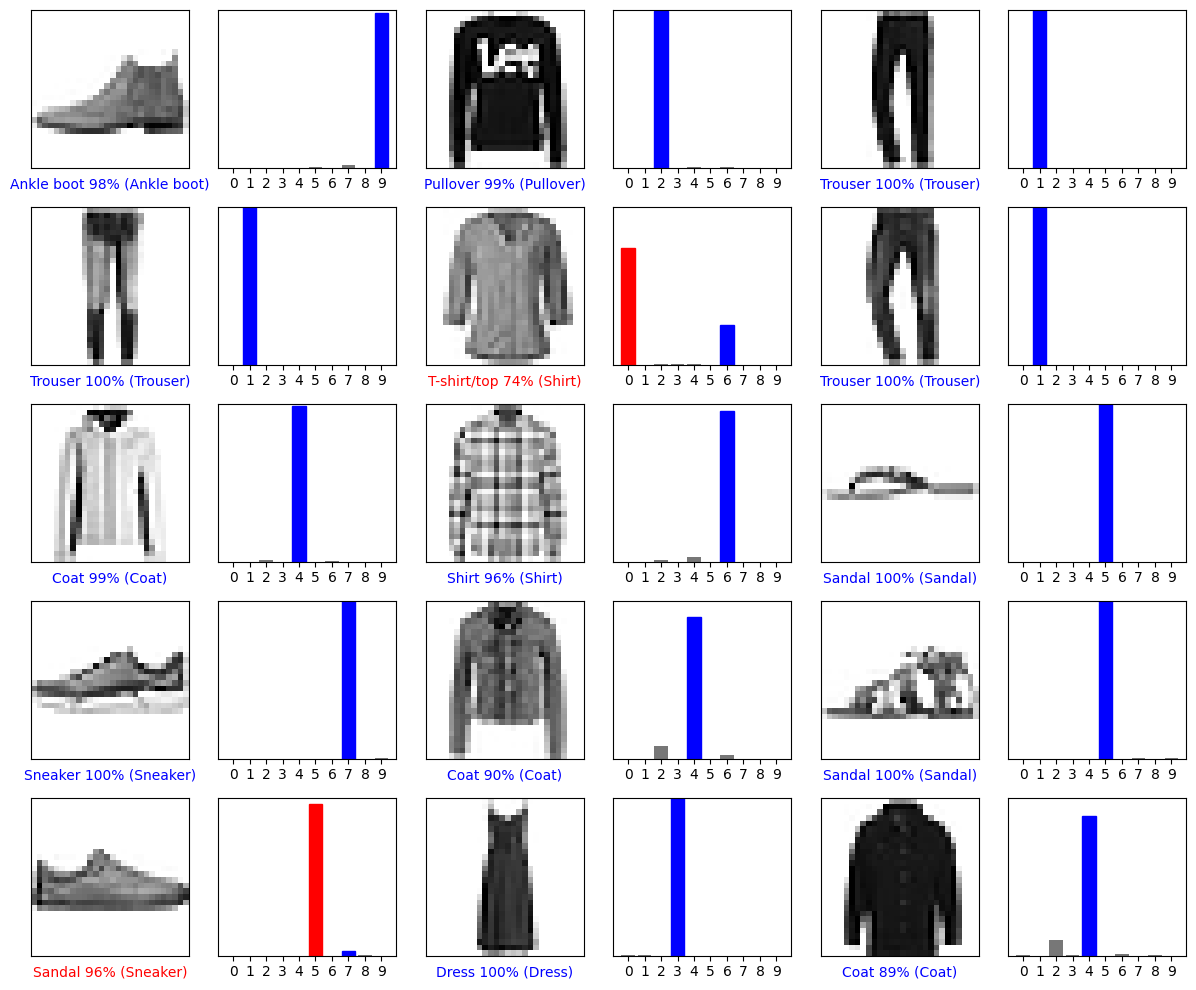

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()